## L1 - Linear models and gradient descent

### Books
1. [Deep Learning, I. Goodfellow, Y. Bengio and A. Courville](http://www.deeplearningbook.org/)
2. [Neural networks for pattern recognition, C. Bishop](http://cs.du.edu/~mitchell/mario_books/Neural_Networks_for_Pattern_Recognition_-_Christopher_Bishop.pdf)
3. [Machine learning: a probabilistic perspective, K. Murphy](http://dsd.future-lab.cn/members/2015nlp/Machine_Learning.pdf)

### 0. Basic classification

Here you can see basic (possible, non standard) classification of [machine learning](https://en.wikipedia.org/wiki/Machine_learning) tasks.
1. [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning)
 1. [Regression](https://en.wikipedia.org/wiki/Regression_analysis)
 2. [Classification](https://en.wikipedia.org/wiki/Statistical_classification)
 3. [Ranking](https://en.wikipedia.org/wiki/Learning_to_rank)
2. [Reinforcment learning](https://en.wikipedia.org/wiki/Reinforcement_learning)
3. [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
 1. Clustering 
 2. Manifold learning
 3. Matrix decompostion (factorization)
 4. Dimension reduction
 
In this lab we consider only supervised learning. Namely, linear regression and binary linear classification, as simple methods for beginning.

### 1. Supervised learning basics
A supervised learning algorithm is an algorithm that is able to learn from data. Now we need only to clarify what is data and what it means to learn?

Let $\{x_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{X} = \mathbb{R}^{n}$ and $\{y_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{Y}$. Here $\mathbb{X}$ is the whole set of objects and $\mathbb{Y}$ is all possible labels of objects, so $\{x_i\}_{i=1}^{\mathcal{l}}$ is subset with known labels $\{y_i\}_{i=1}^{\mathcal{l}}$. We want to find algorithm, that can predict $y$ for any $x \in \mathbb{X}$. Actually, $x = (x^1, \dots, x^n)$ is some vector of features (formal description), but $x^k$ can have different nature. 

* $x^k \in \{0, 1\}$ – binary feature, boolean flag
* $x^k \in \{1,\dots, m\}$ – categorical (nominal), classification of entities into particular categories.
* $x^k \in \{1,\dots, m\}^<$ – ordinal, classification of entities in some kind of ordered relationship.
* $x^k \in \mathbb{R}$ – cardinal, classification based on a numerical value.

Categorical features are commonly encoded in some way (for exaple [one-hot encoding](https://en.wikipedia.org/wiki/One-hot)) to ignore false ordering (important for metric algorithms). Moreover it's possible to cast any type of feature to $\mathbb{R}$, that's why we suppouse that $\mathbb{X} = \mathbb{R}^{n}$ further.

Process of finding algorithm, that can predict labels, is called training. Usually, it is reduced to minimization problem of the empirical risk.
$$\arg \min_{\theta} Q(\theta) = \arg \min_{\theta} \frac{1}{\mathcal{l}}\sum_{i=1}^{\mathcal{l}} \mathcal{L}(f(x_i | \theta), y_i).$$
Here $\mathcal{L}$ – some loss function that shows how good we predict $y$, and $f(x|\theta)$ is parametric function, where $\theta \in \Theta$.

### 2. Linear regression
For regression task $\mathbb{Y} = \mathbb{R}$. In case of linear model we have learning vector of parameters $w \in \mathbb{R}^n$ and predict $y$ as 
$$y = w^Tx + b.$$

For simplicity, let the last element of $x$ is always $1$ and $w$ is concatenation of $[w, b]$. So, we can rewrite model as $y = w^Tx$. For MSE (mean square error) we have following optimization problem
$$\arg \min_{w} Q(w) = \arg \min_{w} \sum_{i=1}^{\mathcal{l}}\big(w^Tx_i - y_i\big)^2.$$

Let $X$ is matrix, where $i$-th row is feature vector of $i$-th object and $Y$ – vector of labels. In this case our expression can be rewritten in matrix form
$$\arg\min_{w}||Xw - Y ||_{2}.$$
But this problem is already well studied and has the analytical solution
$$w = (X^TX)^{-1}X^TY.$$

#### Exercises
1. Let $y = sin(x) + \varepsilon$, where $x \in [0, 2\pi]$ and $\varepsilon \sim \mathcal{N}(0, 0.1)$. Generate 20 train samples and try to learn regression model.
2. Plot train data and model's predictions.
3. As you see, model has no enough capacity to fit train data. Let's add polynomial features, namely $x^2$ and $x^3$.
4. Train linear model one more time and plot results again.
5. What happens if you add more features, for example full range $x^{0},\dots,x^{7}$? 

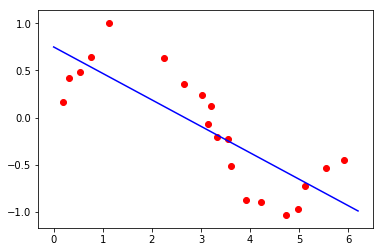

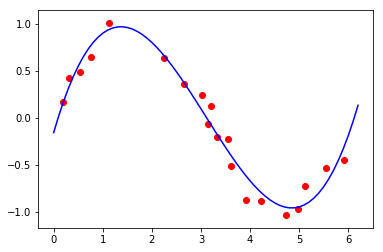

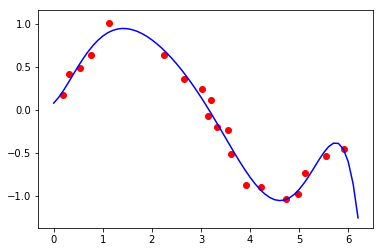

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

#Строим матрицу степеней вектора
def polynom_matrix(vector, degree):
    mat_total = vector
    mat_deg = vector
    for i in range(degree - 1):
        mat_deg = mat_deg * vector
        mat_total = np.vstack((mat_total, mat_deg))
    return np.vstack((mat_total, np.ones((1, len(vector)))))

#По матрице степеней вектора получаем значения функции при векторе коэффициентов w0
def get_y(pol_mat, w0):
    y_coeff = np.transpose(pol_mat) * w0
    return y_coeff.sum(axis = 1)

#Строим наш многочлен
def line(deg, x_test, y_test, colour):
    x = polynom_matrix(x_test, deg)
    #Аналитическое решение
    w = np.linalg.inv(x @ x.T) @ x @ y_test.T
    line_x = np.arange(0, 2 * pi, 0.1)
    #Значения нашего многочлена в точках line_x
    line_y = get_y((polynom_matrix(line_x, deg)), w)
    plt.plot(line_x, line_y, color=colour)
    plt.scatter(x_train, y_train, color='r')
    plt.show()
    return

pi = 3.14
sigma = 0.1
#Генерируем точки
x_train = np.array([random.random() * 2 * pi for i in range(20)])
ksi = np.array([sigma * np.random.randn() for i in range(20)])
y_train = np.sin(x_train) + ksi
#Очевидно, прямая не может приближать синус
line(1, x_train, y_train, 'b')
#Третья степень уже приближает достаточно хорошо
line(3, x_train, y_train, 'b')
#Седьмая степень иногда переобучается и график не похож на синус
#Правда иногда все-таки похож, но это зависит от случайной выборки
#Чаще переобучение начинается с 9 степени
line(7, x_train, y_train, 'b')

### 3. Validation
The data used to build the final model usually comes from multiple datasets. In particular, three data sets are commonly used in different stages of the creation of the model.

1. We initially fit our parameters on a __training dataset__, that consists of pairs of a feature vector and the corresponding answer. The current model is run with the training dataset and produces a result, which is then compared with the target, for each input vector in the training dataset. Based on the result of the comparison and the specific learning algorithm being used, the parameters of the model are adjusted. The model fitting can include both variable selection and parameter estimation.

2. Second one called the __validation dataset__. The validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters (e.g. regularization coefficient or number of hidden units in a neural network). Validation datasets can be used for regularization by early stopping: stop training when the error on the validation dataset increases, as this is a sign of overfitting to the training dataset. This simple procedure is complicated in practice by the fact that the validation dataset's error may fluctuate during training. This complication has led to the creation of many ad-hoc rules for deciding when overfitting has truly begun.

3. Finally, the __test dataset__ is a dataset used to provide an unbiased evaluation of a final trained model.

Cross-validation is a validation technique for estimating how accurately a predictive model will perform in practice. The goal of cross validation is to limit problems like overfitting, give an insight on how the model will generalize to an independent dataset.

Cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset and making validation on the other. To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are caveraged over the rounds to estimate a final predictive model.

There are following types:
1. Leave-p-out cross-validation - using p observations as the validation set with all possible ways.
2. k-fold cross-validation - split data into k folds and using each one as validation set.
3. Holdout validation - randomly split data into training and validation set
4. Repeated random sub-sampling validation - repeatedly make random splits of data into training and validation set

#### Exercises
1. Generate 20 validation samples
2. Check quality of your model on train set and validation set.
3. Have you experienced [overfitting](https://en.wikipedia.org/wiki/Overfitting)?
4. Please, read [this article](https://en.wikipedia.org/wiki/VC_dimension) to learn more about model capacity and VC-dimension.

In [2]:
#Строим вектор коэффициентов по заданной степени
def train(deg, x_test, y_test):
    x = polynom_matrix(x_test, deg)
    w = np.linalg.inv(x @ x.T) @ x @ y_test.T
    return w

#Считаем ошибку тестируемого вектора коэффициентов на validation set
def valid_score(w_test, x_vtest, y_vtest):
    y_res = get_y(polynom_matrix(x_vtest, len(w_test) - 1), w_test) #значения нашего многочлена
    y_delta = y_vtest - y_res #разность наших значений и истинных
    y_error = y_delta * y_delta
    return y_error.sum()

#Генерируем validation set
x_valid = np.array([random.random() * 2 * pi for i in range(20)])
ksi_valid = np.array([sigma * np.random.randn() for i in range(20)])
y_valid = np.sin(x_valid) + ksi_valid

#Выводим степень, ошибку на validation set, ошибку на train set
for i in range(10):
    print(i + 1, valid_score(train(i + 1, x_train, y_train), x_valid, y_valid),
          valid_score(train(i + 1, x_train, y_train), x_train, y_train))
#Как видим, начиная с 8-ой степени у нас переобучение
#Вообще, в зависимости от выборки, оно то раньше, то позже

1 4.30756757303 2.42103820335
2 4.63349224097 2.39255525324
3 0.334657636143 0.312823663606
4 0.337963573382 0.312809415334
5 0.220568395489 0.22658624558
6 0.875324038166 0.179674318933
7 2.07336471355 0.163183333042
8 0.547263377278 0.148141536252
9 1.75576104549 0.13256411898
10 6.91839708017 0.110732583062


### 4. Binary linear classification
Let $\mathbb{Y} = \{-1, +1\}$ for binary classification. So linear model looks like
$$sign(w^Tx + b),$$
where $w$ is normal to the separating plane, which is defined parametrically $w^Tx+b=0$. In the half-space, which normal is directed, all points has class +1, otherwise -1. Let's assume that all points of hyperplane has class +1 to resolve the ambiguity. Also we rewrite model in the short variant $sign(w^Tx)$.

As with regression, training of linear classifier may be reduced to an optimization problem. We only have to specify the loss function. The most nature option is
$$\mathcal{L}(y_{pred}, y_{true}) = [y_{pred} \neq y_{true}] = [M < 0],$$
where $M$ is the margin value $yw^Tx$, which indicates how far the classifier puts a point in its class. But this loss has one drawback, it's not differentiable. That's why the optimization problem becomes very complex. However we can use any other function, which majorizes this loss. You can find some popular options below

1. MSE has one big advantage, we optimize convex function with a local minimum. Moreover analytic solution exists.
$$\big(w^Tx - y \big)^2$$

2. Hinge loss function makes our linear classifier [SVM](https://en.wikipedia.org/wiki/Support_vector_machine) (support vector machine).
$$max \big(0, 1 - yw^Tx \big)$$

3. Logistic loss function has a probabilistic meaning. In particular, this loss leads us to the optimal [Bayesian classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) under certain assumptions on the distribution of features. But it's a different story. So it is often used in practice.
$$\ln \big( 1 + \exp(-yw^Tx) \big)$$

#### Exercises
1. Let $\mathbb{P}\{y=1|x\} = \sigma(wx)$, where $\sigma(z) = \frac{1}{1 + \exp(-z)}$. Show that problem below it is nothing like the maximization of the likelihood.
$$\arg\min_{w}Q(w) = \arg\min_{w} \sum_{x, y} \ln \big(1 + \exp(-yw^Tx )) \big)$$
2. Plot all loss functions in the axes $M \times L$.
3. Generate two normally distributed sets of points on the plane.
4. Let points of 1th set (red color) have class +1 and point of 2d set (blue color) have -1.
5. Train linear classifier with MSE (use analytical solution), which splits these sets.
6. Plot points and separating line of trained classifier.
7. What is time comlexity of your solution?

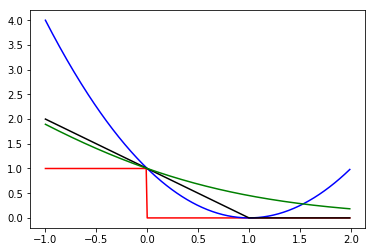

In [3]:
import math

#Определяем наши функции потерь
def Id(M):
    if (M < 0):
        return 1
    return 0

def MSE(M):
    return (M - 1) ** 2

def Hinge_loss(M):
    if (M > 1):
        return 0
    return (1 - M)

def Logistic_loss(M):
    return math.log(1 + math.exp(-M), 2)

#Рисуем функцию на промежутке (a;b)
def graphic(function, a, b, colour):
    x = np.arange(a, b, 0.01)
    y = np.array([function(t) for t in x])
    plt.plot(x, y, color=colour)
    return

graphic(Id, -1, 2, 'r')
graphic(MSE, -1, 2, 'b')
graphic(Hinge_loss, -1, 2, 'black')
graphic(Logistic_loss, -1, 2, 'g')

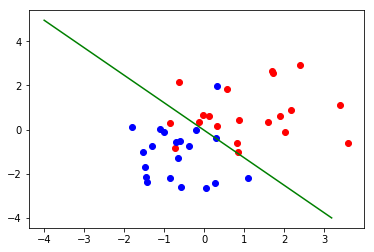

In [5]:
#Создаем множество с соответствующими центрами, разбросом, количеством и цветом
def make_set(center_x1, center_x2, sigma, number, colour):
    x1_cloud = np.array([center_x1 + sigma * np.random.randn() for i in range(number)])
    x2_cloud = np.array([center_x2 + sigma * np.random.randn() for i in range(number)])
    plt.scatter(x1_cloud, x2_cloud, color = colour)
    data = np.vstack((x1_cloud, x2_cloud))
    return np.vstack((data, np.ones((1, number))))

def make_line(w0, length, colour):
    x1 = -length
    x2 = (length * w0[0] - w0[1]) / w0[0]
    y1 = (length * w0[0] - w0[2]) / w0[1]
    y2 = -length
    plt.plot([x1, x2], [y1, y2], color = colour)
    
#Генерируем два множества, объединяем в train set
x_train = np.hstack((make_set(1, 1, 1, 20, 'r'), make_set(-1, -1 , 1, 20, 'b')))
#Присваиваем точкам наших множеств 1 и -1
y_train = np.hstack((np.ones((1, 20)), -np.ones((1, 20))))
#Аналитическое решение
#Время работы линейно зависит от количества точек:
#обратная матрица берется от 3 на 3 вне зависимости от количества точек,
#произведение матриц происходит за линию
w = np.linalg.inv(x_train @ x_train.T) @ x_train @ y_train.T
make_line(w, 4, 'g')

### 5. Gradient descent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient of the function at the current point. Gradient descent is based on the observation that if function $Q(x)$ is defined and differentiable in a neighborhood of a point $x$, then $Q(x)$ decreases fastest if one goes from $x$  in the direction of the negative gradient.

$$x^{k+1} = x^{k} - \lambda \cdot \triangledown Q(x)$$

Here $\lambda$ is step of descent and  $k$ – step number. If $\lambda$ is too large then algorithm may not converge, otherwise training can last a long time. Also there is rather popular hack to slowly decrease $\lambda$ with each step. You need to understand that gradient descent finds exactly local minimum. The easiest way to fight this problem is make several runs of algorithm or have good initialization.

#### Exercises
1. Suggest some quadratic function $Q: \mathbb{R}^2 \rightarrow \mathbb{R}$ with global minimum.
2. Find minimum with gradient descent method.
3. Plot contour lines.
4. Trace the path of gradient descent.
5. How do you choose $\lambda$?
6. Evaluate time complexity of solution.

8.596747008493879e-05 1.9999999976204217 9.545259038949926e-17


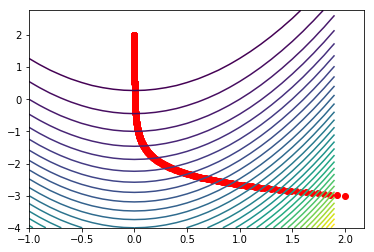

In [6]:
import pylab

#Возьмем функцию (x^2 - y + 2)^2, минимум у неё очевидно 0
def func(x, y):
    return (x * x - y + 2) ** 2

#Найдем частные производные
def deriv_x(x, y):
    return 4 * x * (x ** 2 - y + 2)

def deriv_y(x, y):
    return 2 * (y - x * x - 2)

#Будем на каждом шаге сдвигаться в сторону антиградиента
#и запоминать пары точек, чтобы потом нарисовать их
def find_argmin(x_step, y_step, derivate_x, derivate_y, lyambda, steps):
    for i in range(steps):
        delta_x = derivate_x(x_step, y_step)
        delta_y = derivate_y(x_step, y_step)
        x_step = x_step - lyambda * delta_x
        y_step = y_step - lyambda * delta_y
        trace_x.append(x_step)
        trace_y.append(y_step)
        trace_z.append(func(x_step, y_step))
    return [x_step, y_step]

def make_contour(function, x_min, x_max, y_min, y_max, number):
    step_x = abs(x_min - x_max) / number
    step_y = abs(y_min - y_max) / number
    x = np.arange(x_min, x_max, step_x)
    y = np.arange(y_min, y_max, step_y)
    x, y = np.meshgrid(x, y)
    z = function(x, y)
    plt.contour(x, y, z, number)

#Задаем начальное положение
x_start, y_start = 2, -3
trace_x, trace_y = [x_start], [y_start]
trace_z = [func(x_start, y_start)]
#Лямбду выбираем небольшим числом, чтобы не изменять аргументы слишком сильно
#Время работы линейно зависит от количества шагов
argmin_x, argmin_y = find_argmin(x_start, y_start, deriv_x, deriv_y, 0.001, 10000)
make_contour(func, -1, 2, -4, 3, 30)
plt.scatter(trace_x, trace_y, color='r')
print(argmin_x, argmin_y, func(argmin_x, argmin_y))

There is category of function which naive gradient descent works poorly for, e.g. [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function).
$$f(x, y) = (1-x)^2 + 100(y-x^2)^2.$$

#### Exercises
1. Repeat previous steps for Rosenbrock function.
2. What problem do you face?
3. Is there any solution?

0.994373587247526 0.9887562400581974 3.170755559644657e-05


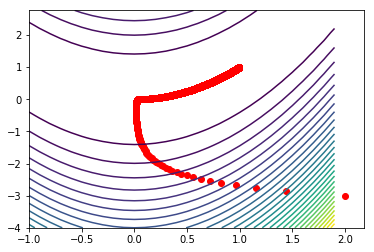

In [7]:
#Определяем новую функцию и частные производные
def R_func(x, y):
    return (1 - x) ** 2 + 100 * ((y - x * x) ** 2)

def R_deriv_x(x, y):
    return 2 * (x - 1) + 400 * x * (x * x - y)

def R_deriv_y(x, y):
    return 200 * (y - x * x)

#Задаем начальное положение
x_start, y_start = 2, -3
trace_x, trace_y = [x_start], [y_start]
argmin_x, argmin_y = find_argmin(x_start, y_start, R_deriv_x, R_deriv_y, 0.0001, 100000)
make_contour(R_func, -1, 2, -4, 3, 30)
plt.scatter(trace_x, trace_y, color='r')
print(argmin_x, argmin_y, R_func(argmin_x, argmin_y))
#В зависимости от начального положения тяжело определять лямбду:
#при больших лямбда, производные быстро убегают на бесконечность,
#при маленьких значениях, мы просто стоим на месте
#Но если удается найти удачные параметры, получается красивая картинка=)

1.0002481183734855 0.9987378730654486 0.0003092674966887367


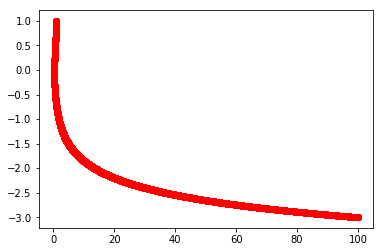

In [8]:
#Теперь изменим нашу функцию find_argmin,
#чтобы мы всегда свигали один из параметров на фиксированное число
def find_argmin_v2(x_step, y_step, derivate_x, derivate_y, shifting, steps):
    for i in range(steps):
        delta_x = derivate_x(x_step, y_step)
        delta_y = derivate_y(x_step, y_step)
        lyambda = shifting / max(abs(delta_x), abs(delta_y))
        x_step = x_step - lyambda * delta_x
        y_step = y_step - lyambda * delta_y
        trace_x.append(x_step)
        trace_y.append(y_step)
    return [x_step, y_step]

#Задаем начальное положение
#Теперь можно задавать большие значения, чем в предыдущем варианте,
#потому что у нас фиксированный сдвиг на 0.001 по одной из координат
x_start, y_start = 100, -3
trace_x, trace_y = [x_start], [y_start]
argmin_x, argmin_y = find_argmin_v2(x_start, y_start, R_deriv_x, R_deriv_y, 0.002, 100000)
plt.scatter(trace_x, trace_y, color='r')
print(argmin_x, argmin_y, R_func(argmin_x, argmin_y))
#Если начальная точка далеко, нужно либо уменьшить shifting, либо увеличить steps

There are some variations of the method, for example steepest descent, where we find optimal $\lambda$ for each step.
$$\lambda^{k} = \arg\min_{\lambda}Q(x_k - \lambda\triangledown Q(x_k)).$$

#### Exercises
1. Split red and blue sets of points again. Train linear model using gradient descent and MSE.
2. Plot your splitting line. Compare with analytical solution.
3. Try steepest descent.
4. Comare gradient descent methods and show its convergence in axes $[step \times Q]$.

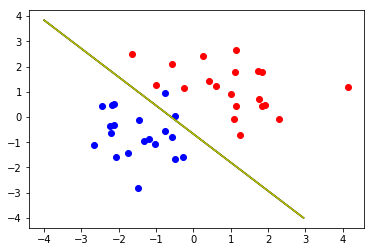

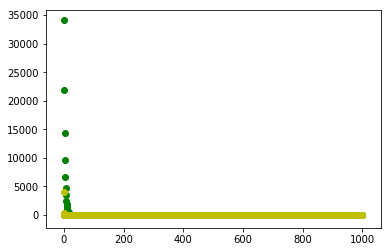

In [9]:
def argmin_w_desc(w_desc, gradient, steps, lyambda):
    for i in range(steps):
        w_desc = w_desc - lyambda * gradient(w_desc)
        loss_desc.append(loss(w_desc))
    return w_desc

#Аналитическая формула выглядит достаточно говнисто:
#(на самом деле она нормально сворачивается, если считать
#как белый человек, но мне она уже слишком запала в душу)
#g = градиент, x = x_train, y = y_train, w = вектор коэффициентов
def shit_find_lambda(w, g, x, y):
    a = w @ x @ x.T @ g.T
    b = g @ x @ x.T @ w.T
    c = g @ x @ y.T
    d = y @ x.T @ g.T
    e = (g @ x @ x.T @ g.T).sum()
    return (a + b - c - d).sum() / (2 * e)
    
def argmin_w_steep(w_steep, gradient, steps):
    for i in range(steps):
        lyambda = shit_find_lambda(w_steep, gradient(w_steep), x_train, y_train)
        w_steep = w_steep - lyambda * gradient(w_steep)
        loss_steep.append(loss(w_steep))
    return w_steep

#Я дундук, поэтому считал каждую производную отдельно
def grad(w):
    w_0 = 2 * ((w @ x_train - y_train) @ (x_train[0].T)).sum()
    w_1 = 2 * ((w @ x_train - y_train) @ (x_train[1].T)).sum()
    w_2 = 2 * ((w @ x_train - y_train) @ (x_train[2].T)).sum()
    return np.array([w_0, w_1, w_2])

def loss(w):
    lost = w.T @ x_train - y_train
    Q_loss = lost * lost
    return Q_loss.sum()

#Генерируем два множества, объединяем в train set
x_train = np.hstack((make_set(1, 1, 1, 20, 'r'), make_set(-1, -1 , 1, 20, 'b')))
#Присваиваем точкам наших множеств 1 и -1, задаем количество шагов
y_train = np.hstack((np.ones((1, 20)), -np.ones((1, 20))))
grad_steps = 1000
#Создаем массивы для хранения ошибки на очередном шаге
loss_desc = [loss(w)]
loss_steep = [loss(w)]
step = np.arange(grad_steps + 1)
#Задаем начальную точку и находим наши решения
w = np.array([10, 20, 10])
w_desc = argmin_w_desc(w, grad, grad_steps, 0.001)
w_anal = np.linalg.inv(x_train @ x_train.T) @ x_train @ y_train.T
w_steepest = argmin_w_steep(w, grad, grad_steps)
#Рисуем наши прямые
make_line(w_desc, 4, 'g')
make_line(w_anal, 4, 'black')
make_line(w_steepest, 4, 'y')
plt.show()
#Как видим, все три прямые совпали (если брать количество шагов больше, чем мало)
plt.scatter(step, loss_desc, color='g')
plt.scatter(step, loss_steep, color='y')
plt.show()
#Легко заметить, что steppest приближается к оптимальному значению намного быстрее

### 6. Stochastic gradient descent

Sometimes you have so huge amount of data, that usual gradient descent becomes too slow. One more option, we have deal with data flow. In this case stochastic gradient method appears on the stage. The idea is simple. You can do a descent step, calculating error and gradient not for all samples, but for some small batch only.

#### Еxercises
1. Download [mnist](https://www.kaggle.com/c/digit-recognizer).
2. Train linear classificator for digits 0 and 1, using logistic loss function and stochastic gradient descent.
3. Use holdout to check [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) of classification.
4. How do accuracy and training time depend on bathch size?
5. Plot graphic that proves your words.
6. How many epochs you use? Why?
7. Plot value of loss function for each step (try use [exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)).

In [10]:
import pandas as pd
data = pd.read_csv('train.csv')
data = np.array(data)

In [11]:
#Достаем вектора с цифрами 0 и 1, перемешиваем их между собой
x_train = np.array(data[0][1:])
y_train = [1]
for d in data[1:]:
    if d[0] == 0:
        x_train = np.vstack((x_train, d[1:]))
        y_train.append(-1)
    if d[0] == 1:
        x_train = np.vstack((x_train, d[1:]))
        y_train.append(1)
y_train = (np.array([y_train])).T
x_train = np.hstack((x_train, np.ones((len(y_train), 1))))
train_set = np.hstack((y_train, x_train))
np.random.shuffle(train_set)

In [12]:
import time

#Наша функция потерь
def Log_loss(w, x, y):
    res = 0
    for i in range(len(y)):
        #При большом отрицательном показателе экспоненты она примерно 0
        if (y[i] * w @ x[i].T > 20):
            res += 0
        #При большом положительном показателе экспоненты, логарифм от неё равен показателю
        elif (y[i] * w @ x[i].T < -20):
            res += -y[i] * w @ x[i].T
        #Во всех остальных точках считаем как белые люди
        else:
            res += math.log(1 + math.exp(-y[i] * w @ x[i].T))
    return res

#Находим градиент по вектору коэффициентов w, x = x_train, y = y_train
#(посчитали производную Log_loss)
def derivate(w, x, y):
    der = np.zeros((1, 785)).T
    for j in range(785):
        for i in range(x.shape[0]):
            #Аналогично как и в функции Log_loss смотрим на показатель экспоненты
            if (y[i] * w @ x[i].T > 20):
                der[j] += 0
            elif (y[i] * w @ x[i].T < -20):
                der[j] += y[i] * x[i][j]
            else:
                a = math.exp(y[i] * w @ x[i].T)
                der[j] += y[i] * x[i][j] / (1 + a)
    return -der.T

def stoh_gradient(w_steep, gradient, batch_size, echos, lyambda, data_train):
    start = time.time()
    for i in range(echos):
        np.random.shuffle(data_train)
        y = data_train[:,0]
        x = data_train[:,1:]
        begin = 0
        step = 1
        #В следующей строчке, по хорошему, надо убрать min(1000, x.shape[0])
        #и оставить просто x.shape[0]
        #Но чтобы быстрее проверять батчи разного размера, проще поставить 1000
        #Так он работает на 1/8 выборки, которая предварительно перемешена
        while begin < min(1000, x.shape[0]):
            end = min(begin + batch_size, x.shape[0])
            w_steep = w_steep - lyambda * gradient(w_steep, x[begin:end], y[begin:end])
            begin = end
            loss_depend.append(Log_loss(w_steep, x_train, y_train))
            steps.append(step)
            step += 1
    time_depend.append(time.time() - start)
    batches.append(batch_size)
    accuracy_depend.append(1 - accuracy(w_steep, x_train, y_train))
    return w_steep

#Замеряем точность тестируемого вектора коэффициентов w на x_test, y_test
def accuracy(w, x, y):
    right = 0
    results = (w @ x.T).T
    for i in range(len(y)):
        if (results[i] * y[i] > 0):
            right += 1
    return right/len(y)

batches = []
accuracy_depend = []
time_depend = []
loss_depend = []
steps = []
#Задаем точку отправления и находим наш вектор коэффициентов
w_begin = np.zeros((1, 785))
w_best = stoh_gradient(w_begin, derivate, 100, 1, 0.01, train_set)
print(accuracy(w_best, x_train, y_train))

0.9952359346642469


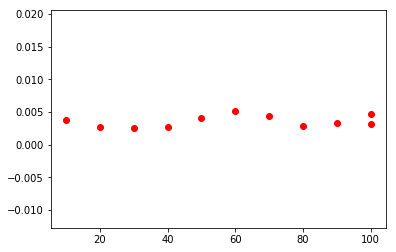

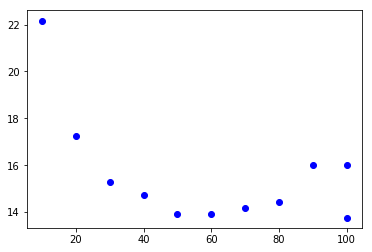

In [13]:
import time

#Замеряем зависимость точности и времени от размера батча на одной эпохе
#Очевидно, количество эпох не влияет на отношение затраченного времени, поэтому пусть будет одна
#Размеры батчей от 10 до 100
for j in range(10):
    stoh_gradient(w_begin, derivate, 10 * j + 10, 1, 0.01, train_set)
    
plt.scatter(batches, accuracy_depend, color='r')
plt.show()
plt.scatter(batches, time_depend, color='b')
plt.show()
#Поскольку точность близка к 1, то выводим её разность с едиинцей
#Видно, что зависимости точности от размера батча тут не разглядеть
#Каждый раз точность просто достаточно велика
#Время работы одной эпохи не зависит от размера батча:
#время колеблется примерно на 10%

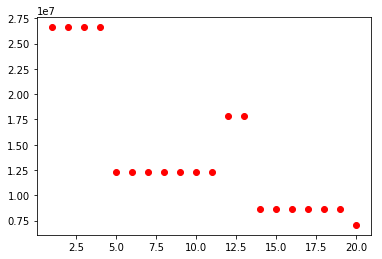

In [14]:
#Рисуем зависимость функции потерь от очередного шага
#На самом деле на немаленьких батчах он учится уже на первом шаге,
#Поэтому функция потерь невелика
loss_depend = []
steps = []
stoh_gradient(w_begin, derivate, 50, 1, 0.1, train_set)
plt.scatter(steps, loss_depend, color='r')

#### Momentum method
Stochastic gradient descent with momentum remembers the update of $x$ at each iteration, and determines the next update as a linear combination of the gradient and the previous update
$$x^{k+1} = x^{k} - s^{k},$$ where $s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k)$, $0 <\gamma < 1$ – smoothing ratio and $s^{-1} = 0$.

#### Еxercises
1. Find minimum for $Q(x,y)=10x^2+y^2$ with descent method.
2. Use momentum method and compare pathes.
3. How do you choose $\gamma$?

[0.007300010159404386, 1e-323] [0.006614341101034595, 5e-324]


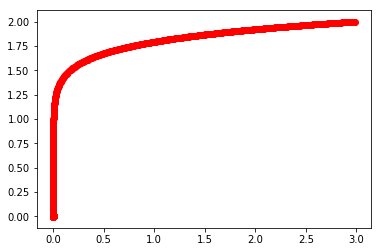

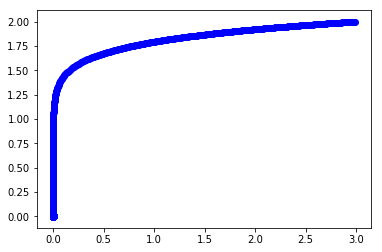

In [15]:
#Находим частные производные
def gradx(x ,y):
    return 20 * x

def grady(x, y):
    return 2 * y

def moment_gradient(x, y, der_x, der_y, steps, shifting, alpha):
    x_prev = x
    y_prev = y
    moment_path_x.append(x)
    moment_path_y.append(y)
    for i in range(steps):
        delta_x = der_x(x, y)
        delta_y = der_y(x, y)
        lyambda = shifting / max(abs(delta_x), abs(delta_y))
        x = x * (1 - alpha) + x_prev * alpha - lyambda * der_x(x, y)
        y = y * (1 - alpha) + y_prev * alpha - lyambda * der_y(x, y)
        moment_path_x.append(x)
        moment_path_y.append(y)
        x_prev = moment_path_x[-2]
        y_prev = moment_path_y[-2]
    return [x, y]

def descent_gradient(x, y, der_x, der_y, steps, shifting):
    descent_path_x.append(x)
    descent_path_y.append(y)
    for i in range(steps):
        delta_x = der_x(x, y)
        delta_y = der_y(x, y)
        lyambda = shifting / max(abs(delta_x), abs(delta_y))
        x = x - lyambda * der_x(x, y)
        y = y - lyambda * der_y(x, y)
        descent_path_x.append(x)
        descent_path_y.append(y)
    return [x, y]

#Задаем начальную точку, находим наши вектора коэффициентов
moment_path_x = []
moment_path_y = []
descent_path_x = []
descent_path_y = []
x_start = 3
y_start = 2
w_moment = moment_gradient(x_start, y_start, gradx, grady, 10000, 0.01, 0.2)
w_descent = descent_gradient(x_start, y_start, gradx, grady, 10000, 0.01)
print(w_moment, w_descent)
plt.scatter(moment_path_x[1:], moment_path_y[1:], color='r')
plt.show()
plt.scatter(descent_path_x[1:], descent_path_y[1:], color='b')
plt.show()
#В начале пути очень схожи
#Ближе к точке минимума momentum начинает колебаться от отрицательных значений к положительным
#Это лучше видно, если взять параметр в momentum method близкий к 1 (например, 0.99)
#Вообще, параметр не нужно брать очень маленьким/большим, так как тогда
#либо мы почти не зависим от предыдущего шага, либо почти не зависим от градиента

#### Nesterov accelerated gradient
And the logical development of this approach leads to the accelerated Nesterov's gradient. The descent step is calculated a little differently
$$s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k - \gamma s^{k-1}),$$
so we find gradient at the point which moment will move us.

#### Еxercises
1. Compare this method and previous with Rosenbrock function.
2. Plot traces of both algorithms.

[1.2537940569936536, 1.5616596995216534] [1.2177925544086714, 1.491783935828953] [0.9206306140730007, 0.8490905645962437]


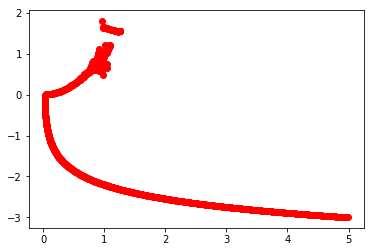

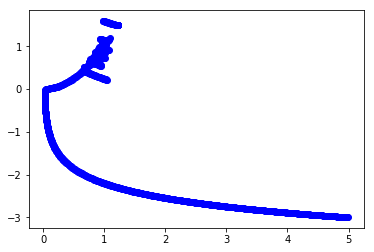

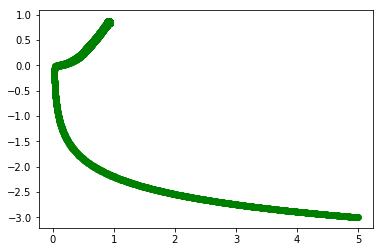

In [16]:
def nesterov_gradient(x, y, der_x, der_y, steps, shifting, alpha):
    x_prev = x
    y_prev = y
    nest_path_x.append(x)
    nest_path_y.append(y)
    for i in range(steps):
        x0 = x * (1 + alpha) - alpha * x_prev
        y0 = y * (1 + alpha) - alpha * y_prev
        delta_x = der_x(x0, y0)
        delta_y = der_y(x0, y0)
        lyambda = shifting / max(abs(delta_x), abs(delta_y))    
        x = x * (1 - alpha) + x_prev * alpha - lyambda * der_x(x0, y0)
        y = y * (1 - alpha) + y_prev * alpha - lyambda * der_y(x0, y0)
        nest_path_x.append(x)
        nest_path_y.append(y)
        x_prev = nest_path_x[-2]
        y_prev = nest_path_y[-2]
    return [x, y]

moment_path_x = []
moment_path_y = []
descent_path_x = []
descent_path_y = []
nest_path_x = []
nest_path_y = []
x_start = 5
y_start = -3
w_moment = moment_gradient(x_start, y_start, R_deriv_x, R_deriv_y, 200000, 0.01, 0.2)
w_descent = descent_gradient(x_start, y_start, R_deriv_x, R_deriv_y, 200000, 0.01)
w_nest = nesterov_gradient(x_start, y_start, R_deriv_x, R_deriv_y, 200000, 0.01, 0.4)

print(w_moment, w_descent, w_nest)
plt.scatter(moment_path_x[1:], moment_path_y[1:], color='r')
plt.show()
plt.scatter(descent_path_x[1:], descent_path_y[1:], color='b')
plt.show()
plt.scatter(nest_path_x[1:], nest_path_y[1:], color='g')
plt.show()
#Красный = momentum, синий = descent, зеленый = Nesterov
#Чтобы получить лучший результат, нужно уменьшить лямбду,
#но тогда не видно, как функции колбасит около (1,1)
#Как видим, Nesterov приближается к нужной точке плавнее, чем остальные

#### Adagrad (2011)
Adaptive gradient finds lambda for each dimension of the input vector x. Informally speaking, for sparce features it makes a bigger step, but for regular ones smaller step.
$$x_{i}^{k + 1} = x_{i}^{k} - \frac{\lambda}{\sqrt{G_{i, i}^k } + \varepsilon} \cdot \frac{\partial Q}{\partial x_i}(x^k),$$
* $G^{k} = \sum_{t=1}^{k}g_t g_t^{T}$, где $g_t = \triangledown Q(x^t)$.
* $\varepsilon$ - epsilon to avoid division by zero.
It improves convergence of the learning process (e.g. when using neural networks for text).

#### RMSprop
To avoid growth of the denominator we can use the following modification. Let's calculate the matrix $G^k$ only for a small number of latest steps, it can be done for example using exponential smoothing.
$$G^{k+1} = \gamma G^{k} + (1 - \gamma)g_{k+1}g_{k+1}^{T},$$
where $0< \gamma < 1$ - smoothing factor

#### Еxercises
1. Read about adadelta and adam (links below).
2. Give an example of a function that can show the difference in the studied stohastic gradient methods.
3. Show animation step by step how methods work.
4. Use your favorite method on mnist dataset again.
5. Show convergence of alrotigthm.
6. Check quality, using holdout.

#### Papers
1. [Adadelta (2012)](https://arxiv.org/pdf/1212.5701.pdf)
2. [Adam (2015)](https://arxiv.org/pdf/1412.6980.pdf)

[  9.86777945  96.38379994] [ 0.99357998  0.99029109]


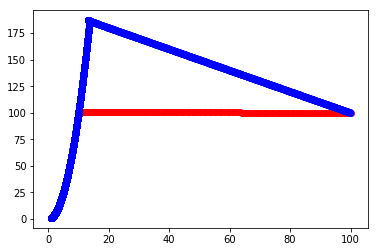

In [17]:
def Adadelta(w, gradient, lyambda, steps):
    eps = 0.00000001
    E_g = 5
    RMS_w = 0
    E_w = 10
    for i in range(steps):
        E_g = lyambda * E_g + (1 - lyambda) * (gradient(w) @ gradient(w).T)
        RMS_g = (E_g + eps) ** (1/2)
        delta_w = (-RMS_w / RMS_g) * gradient(w)
        w = w + delta_w
        E_w = lyambda * E_w + (1 - lyambda) * (delta_w @ delta_w.T)
        RMS_w = (E_w + eps) ** (1/2)
        R_wtrace_x.append(w[0])
        R_wtrace_y.append(w[1])
    return w

def Adam(w, gradient, lyambda, steps, betta1, betta2):
    eps = 0.00000001
    tbetta1 = 1
    tbetta2 = 1
    m = 0
    v = 0
    for i in range(steps):
        if (i < 10):
            m += 1
        if (i < 1000):
            v += 1
        m = betta1 * m + (1 - betta1) * gradient(w)
        v = betta2 * v + (1 - betta2) * gradient(w) * gradient(w).T
        tbetta1 = tbetta1 * betta1
        m_up = m / (1 - tbetta1)
        tbetta2 = tbetta2 * betta2
        v_up = v / (1 - tbetta2)
        w = w - lyambda * m_up / (v_up + eps) ** (1/2)
        R_mtrace_x.append(w[0])
        R_mtrace_y.append(w[1])
    return w

def R_grad(w):
    x = w[0]
    y = w[1]
    return np.array([2 * (x - 1) + 400 * x * (x * x - y), 200 * (y - x * x)])

w_start = np.array([100, 100])
R_wtrace_x = []
R_wtrace_y = []
R_mtrace_x = []
R_mtrace_y = []
w_wR = Adadelta(w_start, R_grad, 0.1, 100000)
plt.scatter(R_wtrace_x, R_wtrace_y, color='r')
w_mR = Adam(w_start, R_grad, 0.1, 100000, 0.9, 0.9)
plt.scatter(R_mtrace_x, R_mtrace_y, color='b')
print(w_wR, w_mR)
#Как видим, на функции Розенброка пути совершенно различны
#Adam на данном примере выглядит намного лучше, чем Adadelta

In [18]:
def adam_stoh_gradient(w, gradient, batch_size, echos, lyambda, data_train, betta1, betta2):
    eps = 0.00000001
    tbetta1 = 1
    tbetta2 = 1
    m = 0
    v = 0
    for i in range(echos):
        np.random.shuffle(data_train)
        y = data_train[:,0]
        x = data_train[:,1:]
        begin = 0
        counter = 0
        while begin < x.shape[0]:
            end = min(begin + batch_size, x.shape[0])
            if (counter < 10):
                m += 1
            if (counter < 1000):
                v += 1
            r = gradient(w, x[begin:end], y[begin:end])
            m = betta1 * m + (1 - betta1) * r
            v = betta2 * v + (1 - betta2) * r @ r.T
            tbetta1 = tbetta1 * betta1
            m_up = m / (1 - tbetta1)
            tbetta2 = tbetta2 * betta2
            v_up = v / (1 - tbetta2)
            w = w - lyambda * m_up / (v_up + eps) ** (1/2)
            begin = end
            counter += 1
    return w

w_begin = np.zeros((1, 785))
w_best = adam_stoh_gradient(w_begin, derivate, 50, 1, 0.1, train_set, 0.9, 0.9)
print(accuracy(w_best, x_train, y_train))

0.9990925589836661
